# Testing Sampling Method on train_test_split

In [1]:
import os
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from atomsci.ddm.pipeline import model_pipeline as mp
from atomsci.ddm.pipeline import model_datasets as md
from atomsci.ddm.pipeline import parameter_parser as parse

Skipped loading some Jax models, missing a dependency. No module named 'haiku'
/opt/anaconda3/envs/atom-dev/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Create Split Dataset

In [12]:
# initiate a parameter for splitting 
df_key = "/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding.csv"
odir="/Users/rwilfong/Downloads/2024_LLNL/sampling/"
params = {
    "dataset_key": df_key,
    "response_cols": 'active', 
    "id_col":"compound_id",
    "smiles_col":"base_rdkit_smiles",
    "result_dir":odir,

    #splitting 
    "split_only":"True",
    "previously_split":"False",
    "splitter":"random",
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",
    "split_strategy": "train_valid_test",
    #"sampling_method":"SMOTE",

    # featurization
    "featurizer": "ecfp",
    "previously_featurized":"False",
    #model params
    "model_type":"RF",
    #"prediction_type":"classification"
}

In [14]:
pparams = parse.wrapper(params)

In [16]:
MP = mp.ModelPipeline(pparams)

In [18]:
split_uuid = MP.split_dataset()

In [19]:
split_uuid

'64a633c3-0329-41ce-9a2c-0ca902abd379'

### Train a Model with SMOTE

In [2]:
# intialize a new parameter for training 
# initiate a parameter for splitting 
df_key = "/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding.csv"
odir="/Users/rwilfong/Downloads/2024_LLNL/sampling/"
split_uuid='64a633c3-0329-41ce-9a2c-0ca902abd379'
#split_uuid="8e0e5968-e604-4c2b-9330-1d248dc02181"
#split_uuid="41722de3-8b1b-49d9-a77a-4dc3be43567d"
params = {
    "dataset_key": df_key,
    "response_cols": 'active', 
    "id_col":"compound_id",
    "smiles_col":"base_rdkit_smiles",
    "result_dir":odir,

    #splitting 
    "split_only":"False",
    "previously_split":"True",
    "split_uuid" : split_uuid,
    "splitter":"random",
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",
    
    # Resampling parameters 
    "sampling_method":"SMOTE",
    #sampling_ratio
    #sampling_k_neighbors

    # featurization
    "featurizer": "ecfp",
    "previously_featurized":"True",
    #model params
    "model_type":"RF",
    "prediction_type":"classification",
    # misc
    "verbose": "True"
}

In [4]:
ampl_param = parse.wrapper(params)

In [5]:
pl = mp.ModelPipeline(ampl_param)

In [6]:
pl.train_model()

train sneak peek: <NumpyDataset X.shape: (1399, 1024), y.shape: (1399, 1), w.shape: (1399, 1), task_names: [0]>
valid sneak peek: <NumpyDataset X.shape: (300, 1024), y.shape: (300, 1), w.shape: (300, 1), ids: ['kdb_100' 'kdb_109' 'kdb_111' ... 'kdb_860' 'kdb_92' 'kdb_99'], task_names: [0]>
split type: train_valid_test, sampling method: SMOTE
train x shape (1399, 1024)
train y shape (1399, 1)
train y: [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
train x shape resampled (2738, 1024)
train y shape resampled (2738, 1)
train y resampled [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


/opt/anaconda3/envs/atom-dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Make without Sampling

In [14]:
# intialize a new parameter for training 
# initiate a parameter for splitting 
df_key = "/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding.csv"
odir="/Users/rwilfong/Downloads/2024_LLNL/sampling/"
split_uuid='64a633c3-0329-41ce-9a2c-0ca902abd379'
#split_uuid="8e0e5968-e604-4c2b-9330-1d248dc02181"
#split_uuid="41722de3-8b1b-49d9-a77a-4dc3be43567d"
params = {
    "dataset_key": df_key,
    "response_cols": 'active', 
    "id_col":"compound_id",
    "smiles_col":"base_rdkit_smiles",
    "result_dir":odir,

    #splitting 
    "split_only":"False",
    "previously_split":"True",
    "split_uuid" : split_uuid,
    "splitter":"random",
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",
    
    # Resampling parameters 
    #"sampling_method":"SMOTE",
    #sampling_ratio
    #sampling_k_neighbors

    # featurization
    "featurizer": "ecfp",
    "previously_featurized":"True",
    #model params
    "model_type":"RF",
    "prediction_type":"classification",
    # misc
    "verbose": "True"
}

In [16]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

train sneak peek: <NumpyDataset X.shape: (1399, 1024), y.shape: (1399, 1), w.shape: (1399, 1), task_names: [0]>
valid sneak peek: <NumpyDataset X.shape: (300, 1024), y.shape: (300, 1), w.shape: (300, 1), ids: ['kdb_100' 'kdb_109' 'kdb_111' ... 'kdb_860' 'kdb_92' 'kdb_99'], task_names: [0]>


/opt/anaconda3/envs/atom-dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A SLAY!

### Testing Classification with RandomUnderSampler

In [3]:
# intialize a new parameter for training 
# initiate a parameter for splitting 
df_key = "/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding.csv"
odir="/Users/rwilfong/Downloads/2024_LLNL/sampling/"
split_uuid='64a633c3-0329-41ce-9a2c-0ca902abd379'
#split_uuid="8e0e5968-e604-4c2b-9330-1d248dc02181"
#split_uuid="41722de3-8b1b-49d9-a77a-4dc3be43567d"
params = {
    "dataset_key": df_key,
    "response_cols": 'active', 
    "id_col":"compound_id",
    "smiles_col":"base_rdkit_smiles",
    "result_dir":odir,

    #splitting 
    "split_only":"False",
    "previously_split":"True",
    "split_uuid" : split_uuid,
    "splitter":"random",
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",
    
    # Resampling parameters 
    "sampling_method":"undersampling",
    #sampling_ratio
    #sampling_k_neighbors

    # featurization
    "featurizer": "ecfp",
    "previously_featurized":"True",
    #model params
    "model_type":"RF",
    "prediction_type":"classification",
    # misc
    "verbose": "True"
}

In [5]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

Beginning splitting
<class 'deepchem.data.datasets.NumpyDataset'>
Beginning sampling method: undersampling.
split strategy used: train_valid_test
resampled!... moving on
Sampling method completed


### Testing Classification with No Sampling

In [10]:
# intialize a new parameter for training 
# initiate a parameter for splitting 
df_key = "/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding.csv"
odir="/Users/rwilfong/Downloads/2024_LLNL/sampling/"
split_uuid='64a633c3-0329-41ce-9a2c-0ca902abd379'
#split_uuid="8e0e5968-e604-4c2b-9330-1d248dc02181"
#split_uuid="41722de3-8b1b-49d9-a77a-4dc3be43567d"
params = {
    "dataset_key": df_key,
    "response_cols": 'active', 
    "id_col":"compound_id",
    "smiles_col":"base_rdkit_smiles",
    "result_dir":odir,

    #splitting 
    "split_only":"False",
    "previously_split":"True",
    "split_uuid" : split_uuid,
    "splitter":"random",
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",
    # Resampling parameters 
    #"sampling_method":"SMOTE",
    #sampling_ratio
    #sampling_k_neighbors

    # featurization
    "featurizer": "ecfp",
    "previously_featurized":"True",
    #model params
    "model_type":"RF",
    "prediction_type":"classification",
    # misc
    "verbose": "True"
}

In [12]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

Beginning splitting
<NumpyDataset X.shape: (1399, 1024), y.shape: (1399, 1), w.shape: (1399, 1), task_names: [0]> <NumpyDataset X.shape: (300, 1024), y.shape: (300, 1), w.shape: (300, 1), ids: ['kdb_100' 'kdb_109' 'kdb_111' ... 'kdb_860' 'kdb_92' 'kdb_99'], task_names: [0]>


/opt/anaconda3/envs/atom-dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Great, this works! 

## Evaluate the Results from the SMOTE and Regular Method

model_uuid: `271367e0-d4c8-4fcf-8448-7b71e755c808` is from regular classification (no resampling)

model_uuid: `b5f885b2-fa0d-4269-a6eb-deb062b0b2b7` is from SMOTE resampling

model_uuid: `7fba8958-eae6-48af-a0aa-6342ed26e111` is from random undersampling

model_uuid: `4d93737d-90f9-4bcd-b961-411ad2e7c6fb` is also from random undersampling

In [22]:
# evaluate the model created 
from atomsci.ddm.pipeline import compare_models as cm
pd.set_option('display.max_columns', None)

In [10]:
result_df=cm.get_filesystem_perf_results(result_dir='/Users/rwilfong/Downloads/2024_LLNL/sampling', pred_type='classification')

Found data for 4 models under /Users/rwilfong/Downloads/2024_LLNL/sampling


In [12]:
result_df

,model_uuid,model_path,ampl_version,model_type,dataset_key,features,splitter,split_strategy,split_uuid,model_score_type,feature_transform_type,weight_transform_type,model_choice_score,best_train_roc_auc_score,best_train_prc_auc_score,best_train_precision,best_train_recall_score,best_train_num_compounds,best_train_accuracy_score,best_train_bal_accuracy,best_train_npv,best_train_matthews_cc,best_train_kappa,best_train_cross_entropy,best_train_confusion_matrix,best_valid_roc_auc_score,best_valid_prc_auc_score,best_valid_precision,best_valid_recall_score,best_valid_num_compounds,best_valid_accuracy_score,best_valid_bal_accuracy,best_valid_npv,best_valid_matthews_cc,best_valid_kappa,best_valid_cross_entropy,best_valid_confusion_matrix,best_test_roc_auc_score,best_test_prc_auc_score,best_test_precision,best_test_recall_score,best_test_num_compounds,best_test_accuracy_score,best_test_bal_accuracy,best_test_npv,best_test_matthews_cc,best_test_kappa,best_test_cross_entropy,best_test_confusion_matrix,rf_estimators,rf_max_features,rf_max_depth,max_epochs,best_epoch,learning_rate,layer_sizes,dropouts,xgb_gamma,xgb_learning_rate,xgb_max_depth,xgb_colsample_bytree,xgb_subsample,xgb_n_estimators,xgb_min_child_weight,model_parameters_dict,feat_parameters_dict
2,7fba8958-eae6-48af-a0aa-6342ed26e111,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,1.6.1,RF,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,ecfp,random,train_valid_test,64a633c3-0329-41ce-9a2c-0ca902abd379,roc_auc,normalization,None,0.584736,1.0,1.0,1.0,1.0,60,1.0,1.0,1.0,1.0,1.0,0.160788,"[[[30, 0], [0, 30]]]",0.584736,0.064462,0.013333,0.333333,300,0.746667,0.542088,0.991111,0.019342,0.006536,0.551343,"[[[223, 74], [2, 1]]]",0.599888,0.015974,0.000000,0.000000,300,0.796667,0.402357,0.987603,-0.049203,-0.019385,0.534618,"[[[239, 58], [3, 0]]]",500,32,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""rf_estimators"": 500, ""rf_max_depth"": null, ""...","{""ecfp_radius"": 2, ""ecfp_size"": 1024}"
0,271367e0-d4c8-4fcf-8448-7b71e755c808,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,1.6.1,RF,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,ecfp,random,train_valid_test,64a633c3-0329-41ce-9a2c-0ca902abd379,roc_auc,normalization,None,0.516835,1.0,1.0,1.0,1.0,1399,1.0,1.0,1.0,1.0,1.0,0.013945,"[[[1369, 0], [0, 30]]]",0.516835,0.118128,0.000000,0.000000,300,0.990000,0.500000,0.990000,0.000000,0.000000,0.159633,"[[[297, 0], [3, 0]]]",0.805836,0.034051,0.000000,0.000000,300,0.980000,0.494949,0.989899,-0.010101,-0.010101,0.062606,"[[[294, 3], [3, 0]]]",500,32,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""rf_estimators"": 500, ""rf_max_depth"": null, ""...","{""ecfp_radius"": 2, ""ecfp_size"": 1024}"
3,b5f885b2-fa0d-4269-a6eb-deb062b0b2b7,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,1.6.1,RF,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,ecfp,random,train_valid_test,64a633c3-0329-41ce-9a2c-0ca902abd379,roc_auc,normalization,None,0.514590,1.0,1.0,1.0,1.0,2738,1.0,1.0,1.0,1.0,1.0,0.009567,"[[[1369, 0], [0, 1369]]]",0.514590,0.090628,0.000000,0.000000,300,0.990000,0.500000,0.990000,0.000000,0.000000,0.069099,"[[[297, 0], [3, 0]]]",0.732884,0.023295,0.000000,0.000000,300,0.980000,0.494949,0.989899,-0.010101,-0.010101,0.075955,"[[[294, 3], [3, 0]]]",500,32,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""rf_estimators"": 500, ""rf_max_depth"": null, ""...","{""ecfp_radius"": 2, ""ecfp_size"": 1024}"
1,4d93737d-90f9-4bcd-b961-411ad2e7c6fb,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,1.6.1,RF,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,ecfp,random,train_valid_test,64a633c3-0329-41ce-9a2c-0ca902abd379,roc_auc,normalization,None,0.436027,1.0,1.0,1.0,1.0,60,1.0,1.0,1.0,1.0,1.0,0.172120,"[[[30, 0], [0, 30]]]",0.436027,0.173175,0.011765,0.333333,300,0.713333,0.525253,0.990698,0.011152,0.003476,0.612060,"[[[213, 84], [2, 1]]]",0.736813,0.024589,0.013514,0.333333,300,0.750000,0.543771,0.991150,0.020206,0.006886,0.577493,"[[[224, 73], [2, 1]]]",500,32,None,N

# Sampling with K-Fold Cross Validation

In [14]:
# create a new split 
# intialize a new parameter for training 
# initiate a parameter for splitting 
df_key = "/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding.csv"
odir="/Users/rwilfong/Downloads/2024_LLNL/sampling/"

params = {
    "dataset_key": df_key,
    "response_cols": 'active', 
    "id_col":"compound_id",
    "smiles_col":"base_rdkit_smiles",
    "result_dir":odir,

    #splitting 
    "split_only":"True",
    "previously_split":"False",
    "split_strategy": 'k_fold_cv',
    "splitter":"random",
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",

    # featurization
    "featurizer": "ecfp",
    "previously_featurized":"False",
    #model params
    "model_type":"RF",
    "prediction_type":"classification",
    # misc
    "verbose": "True"
}

In [19]:
pparams = parse.wrapper(params)
MP = mp.ModelPipeline(pparams)
split_uuid = MP.split_dataset()

In [21]:
split_uuid

'70d7ea12-d94f-4efc-9679-e0a59ff2453c'

### Looking at the Split Dataset

In [4]:
df=pd.read_csv('/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding_5_fold_cv_random_70d7ea12-d94f-4efc-9679-e0a59ff2453c.csv')

In [8]:
df.fold.value_counts()

fold
0    639
1    340
2    340
3    340
4    340
Name: count, dtype: int64

In [10]:
df.subset.value_counts()

subset
train_valid    1699
test            300
Name: count, dtype: int64

In [2]:
# training parameters 
df_key = "/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding.csv"
odir="/Users/rwilfong/Downloads/2024_LLNL/sampling/"
split_uuid='70d7ea12-d94f-4efc-9679-e0a59ff2453c'

params = {
    "dataset_key": df_key,
    "response_cols": 'active', 
    "id_col":"compound_id",
    "smiles_col":"base_rdkit_smiles",
    "result_dir":odir,

    #splitting 
    "split_only":"False",
    "previously_split":"True",
    "split_strategy": 'k_fold_cv',
    "split_uuid" : split_uuid,
    "splitter":"random",
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",

    # sampling params
    "sampling_method":"undersampling",
    
    # featurization
    "featurizer": "ecfp",
    "previously_featurized":"True",
    #model params
    "model_type":"RF",
    "prediction_type":"classification",
    # misc
    "verbose": "True"
}

In [3]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

the seed used for training is: 108773292848567948867428781499347714368
seed used: 108773292848567948867428781499347714368


InvalidParameterError: The 'random_state' parameter of RandomUnderSampler must be an int in the range [0, 4294967295], an instance of 'numpy.random.mtrand.RandomState' or None. Got Generator(PCG64) at 0x36BC46BA0 instead.

In [6]:
%debug

> /Users/rwilfong/Downloads/2024_LLNL/fork_ampl/AMPL/atomsci/ddm/pipeline/perf_data.py(1248)accumulate_preds()
   1246             #    self.pred_vals[id] = np.zeros((0, self.num_tasks, class_probs.shape[-1]))
   1247             ###################################
-> 1248             self.pred_vals[id] = np.concatenate([self.pred_vals[id], class_probs[i,:,:].reshape((1,self.num_tasks,-1))], axis=0)
   1249         self.folds += 1
   1250         real_vals = self.get_real_values(ids)



ipdb>  quit


In [12]:
%debug

> /Users/rwilfong/Downloads/2024_LLNL/fork_ampl/AMPL/atomsci/ddm/pipeline/perf_data.py(1352)<listcomp>()
   1350         if ids is None:
   1351             ids = sorted(self.pred_vals.keys())
-> 1352         return np.concatenate([self.weights[id].reshape((1,-1)) for id in ids], axis=0)
   1353 
   1354 



ipdb>  quir


*** NameError: name 'quir' is not defined


ipdb>  quit


In [24]:
from atomsci.ddm.pipeline import perf_plots as pp

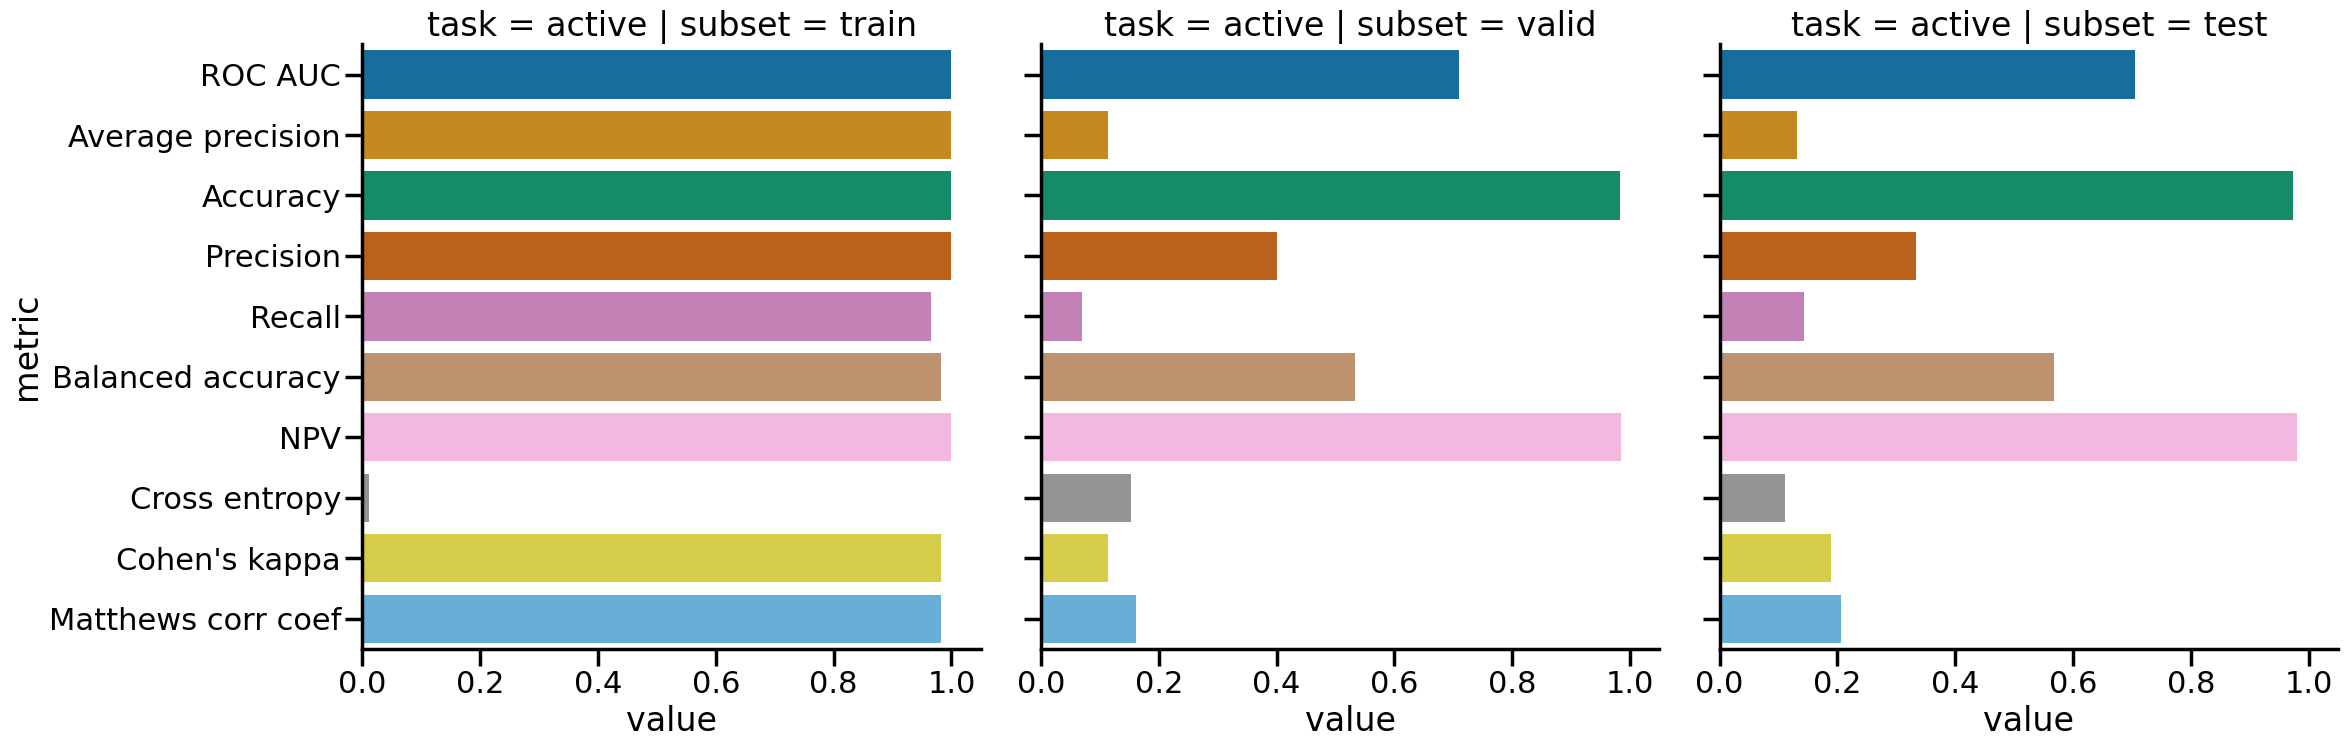

In [26]:
pp.plot_model_metrics(pl, plot_size=8)

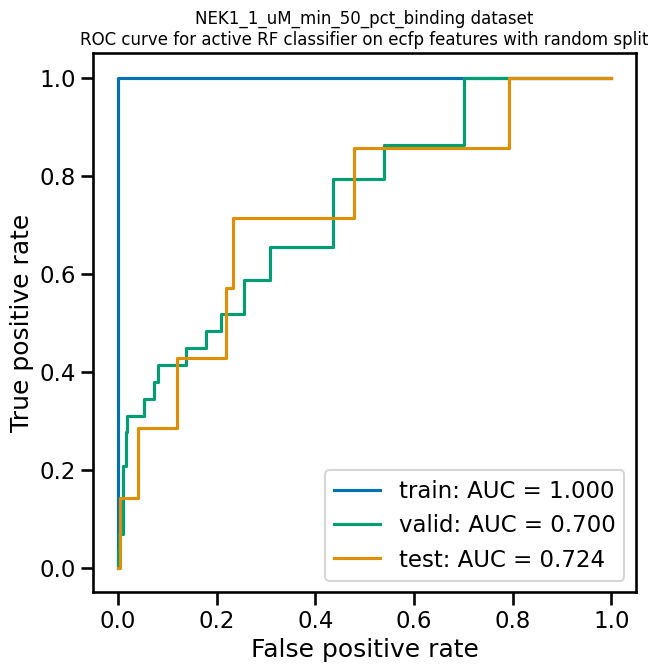

In [28]:
pp.plot_ROC_curve(pl)

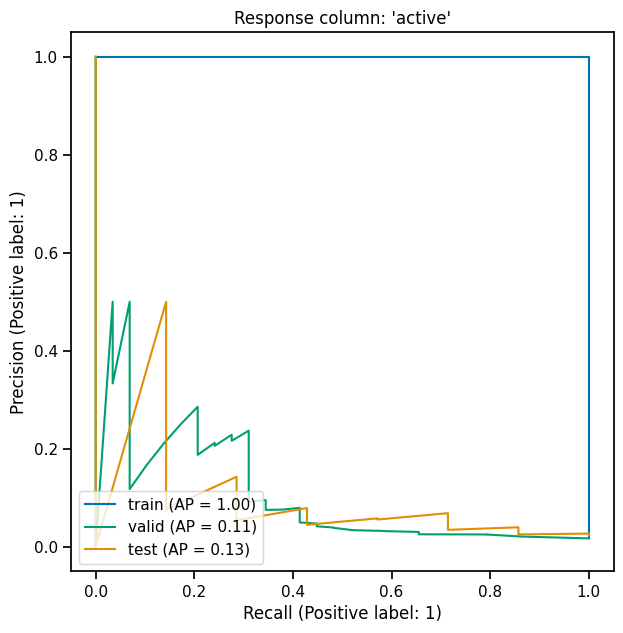

In [30]:
pp.plot_prec_recall_curve(pl)

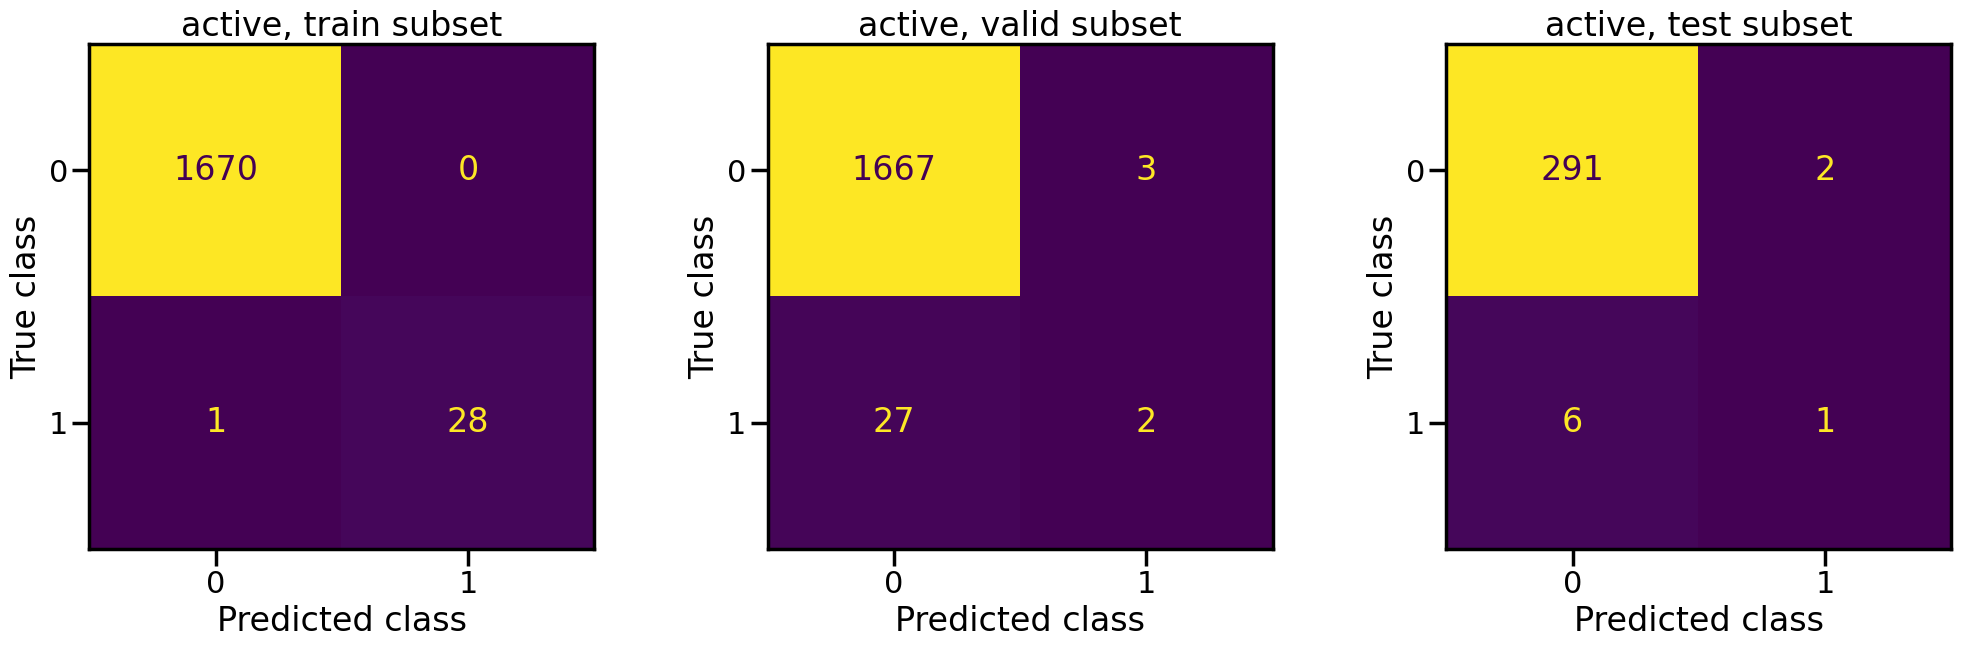

In [32]:
pp.plot_confusion_matrices(pl)

### Training A Classification Model with K-Fold CV

In [13]:
# training parameters 
df_key = "/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding.csv"
odir="/Users/rwilfong/Downloads/2024_LLNL/sampling/"
split_uuid='70d7ea12-d94f-4efc-9679-e0a59ff2453c'

params = {
    "dataset_key": df_key,
    "response_cols": 'active', 
    "id_col":"compound_id",
    "smiles_col":"base_rdkit_smiles",
    "result_dir":odir,

    #splitting 
    "split_only":"False",
    "previously_split":"True",
    "split_strategy": 'k_fold_cv',
    "split_uuid" : split_uuid,
    "splitter":"random",
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",
    
    # featurization
    "featurizer": "ecfp",
    "previously_featurized":"True",
    #model params
    "model_type":"RF",
    "prediction_type":"classification",
    # misc
    "verbose": "True"
}

In [15]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

Beginning splitting
Beginning splitting
Beginning splitting
Beginning splitting
Beginning splitting


In [25]:
from atomsci.ddm.pipeline import perf_plots as pp

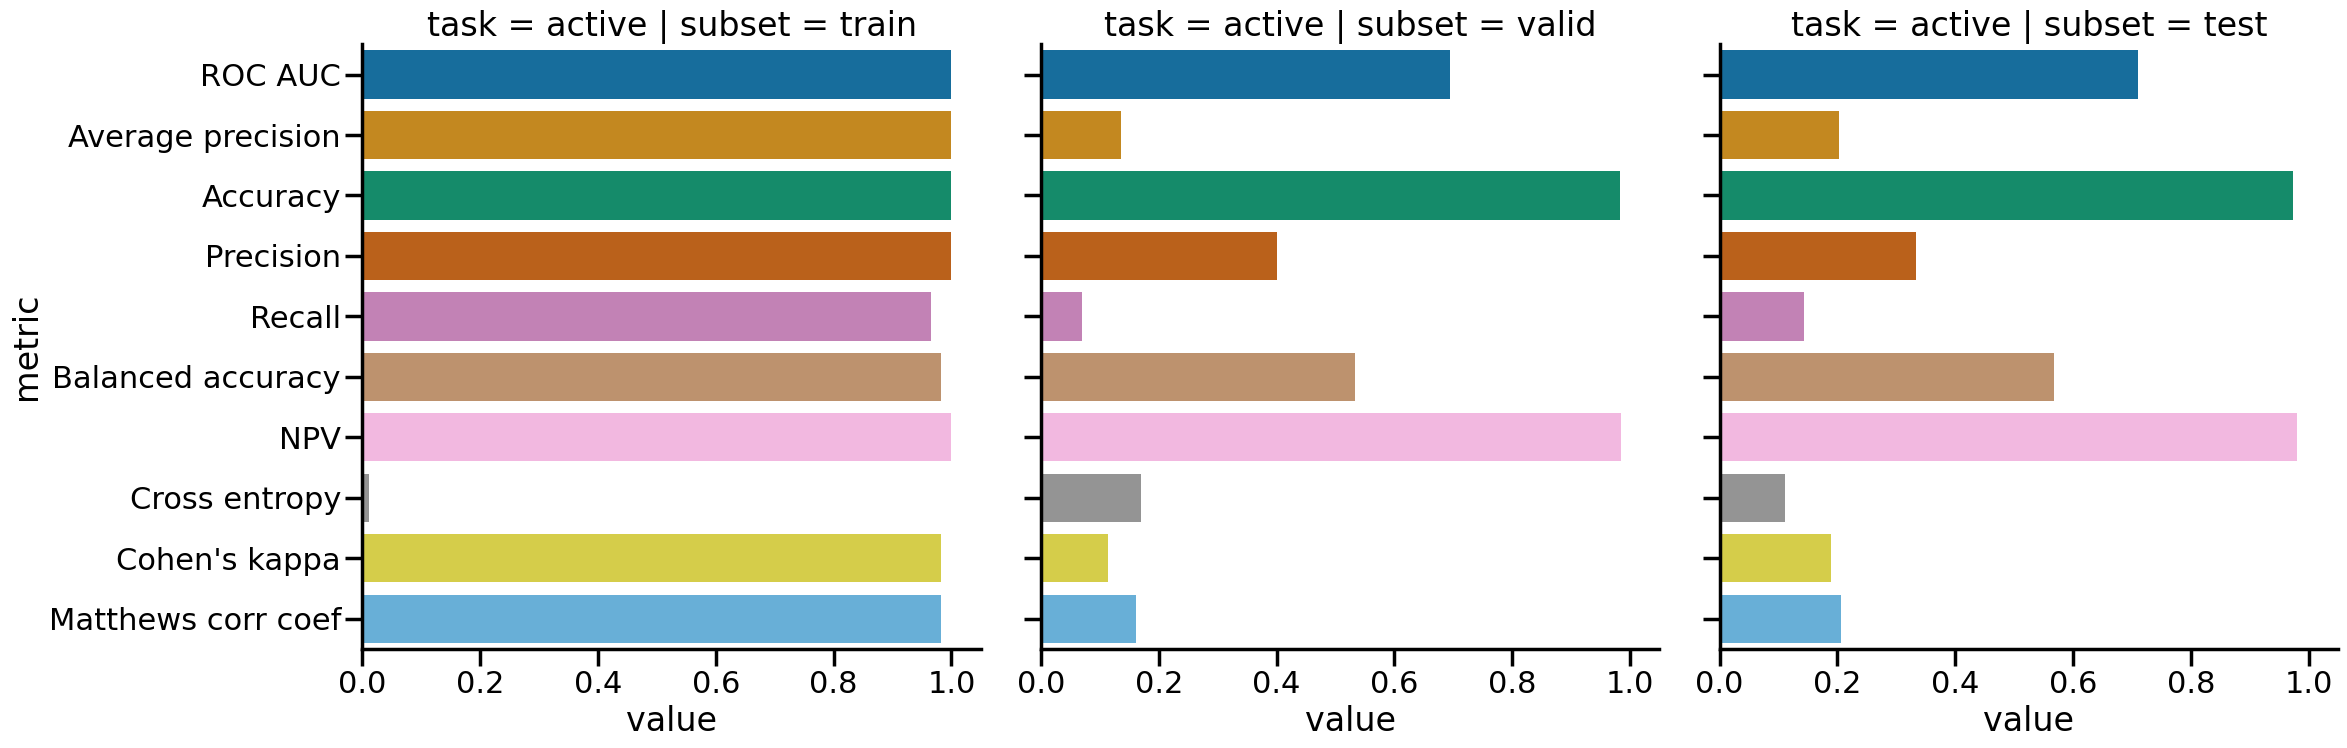

In [27]:
pp.plot_model_metrics(pl, plot_size=8)

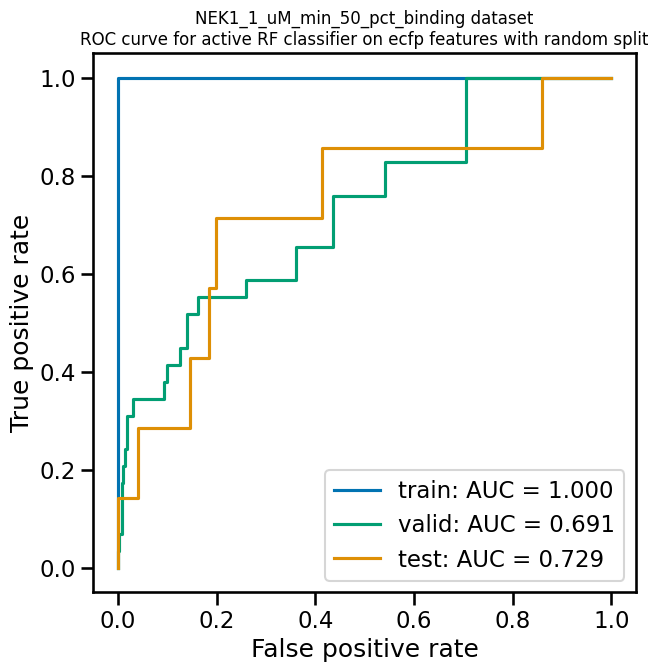

In [29]:
pp.plot_ROC_curve(pl)

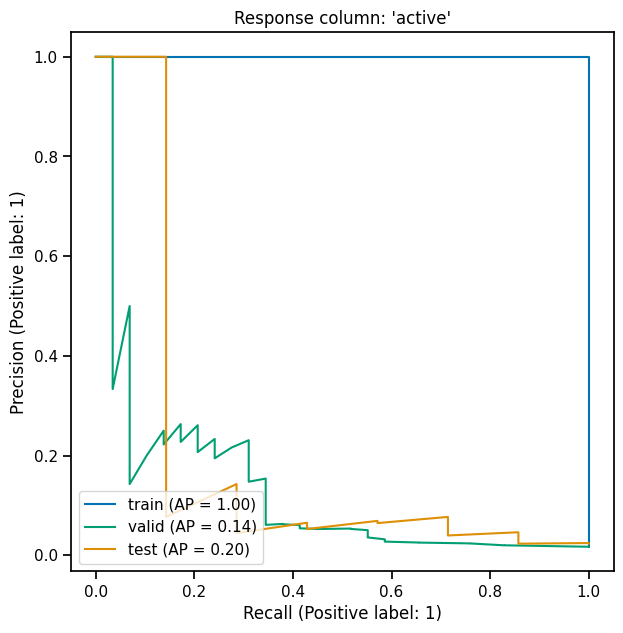

In [31]:
pp.plot_prec_recall_curve(pl)

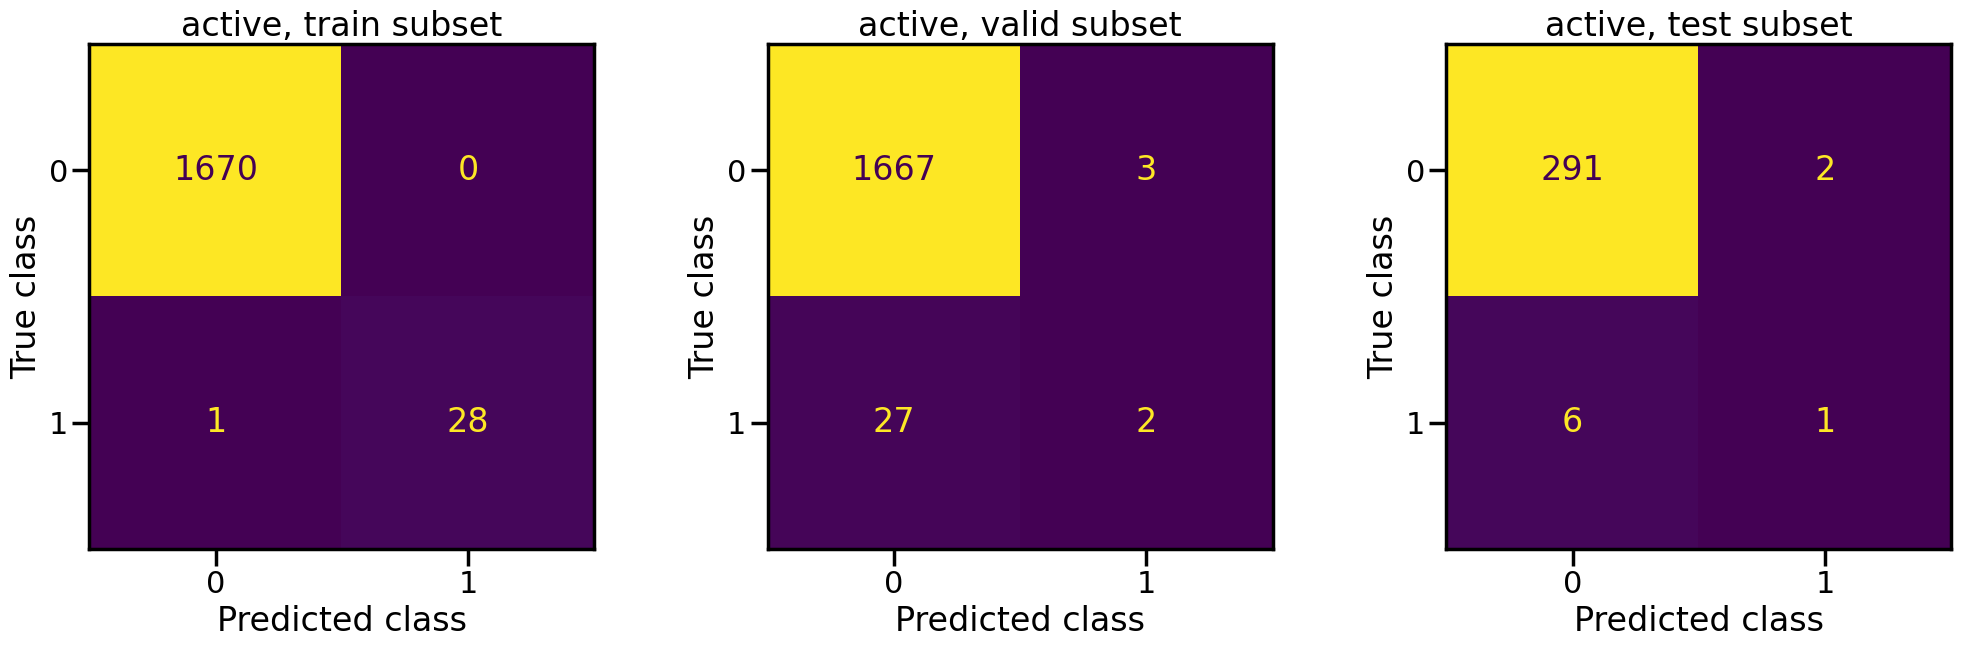

In [35]:
pp.plot_confusion_matrices(pl)

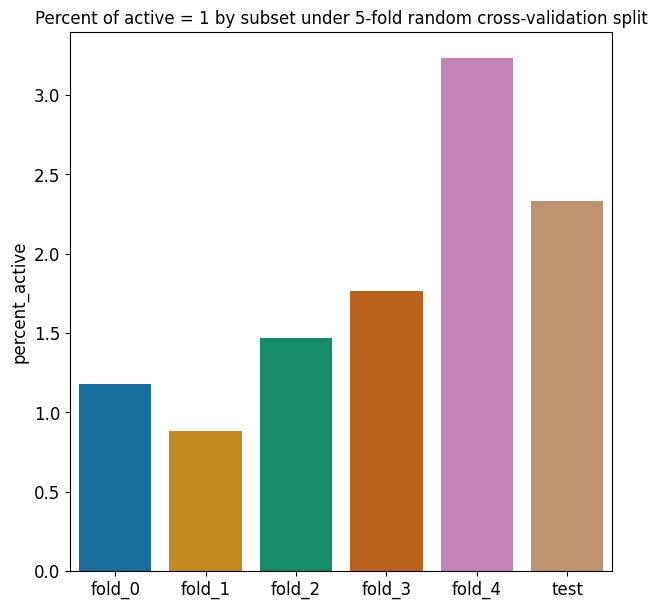

In [43]:
import atomsci.ddm.utils.split_response_dist_plots as srdp
df_key = "/Users/rwilfong/Downloads/2024_LLNL/sampling/NEK1_1_uM_min_50_pct_binding.csv"
#odir="/Users/rwilfong/Downloads/2024_LLNL/sampling/"
split_uuid='70d7ea12-d94f-4efc-9679-e0a59ff2453c'
split_params = {
    "dataset_key" : df_key,
    "smiles_col" : "base_rdkit_smiles",
    "prediction_type": "classification",
    "response_cols" : "active",
    "split_uuid": split_uuid,
    "split_strategy": "k_fold_cv",
    "splitter": 'random',
}
srdp.plot_split_subset_response_distrs(split_params)

### Evaluate Models from K-Fold CV 

model_uuid `6aaa2e79-3a4b-4f4a-aab6-55987de36c79` is k-fold cv classification (no sampling)

model_uuid `ece85e81-e605-4a99-8794-f92533f9f2af` is a k-fold cv classification with smote?

In [34]:
result_df=cm.get_filesystem_perf_results(result_dir='/Users/rwilfong/Downloads/2024_LLNL/sampling', pred_type='classification')
result_df

Found data for 15 models under /Users/rwilfong/Downloads/2024_LLNL/sampling


,model_uuid,model_path,ampl_version,model_type,dataset_key,features,splitter,split_strategy,split_uuid,model_score_type,feature_transform_type,weight_transform_type,model_choice_score,best_train_roc_auc_score,best_train_prc_auc_score,best_train_precision,best_train_recall_score,best_train_num_compounds,best_train_accuracy_score,best_train_bal_accuracy,best_train_npv,best_train_matthews_cc,best_train_kappa,best_train_cross_entropy,best_train_confusion_matrix,best_valid_roc_auc_score,best_valid_prc_auc_score,best_valid_precision,best_valid_recall_score,best_valid_num_compounds,best_valid_accuracy_score,best_valid_bal_accuracy,best_valid_npv,best_valid_matthews_cc,best_valid_kappa,best_valid_cross_entropy,best_valid_confusion_matrix,best_test_roc_auc_score,best_test_prc_auc_score,best_test_precision,best_test_recall_score,best_test_num_compounds,best_test_accuracy_score,best_test_bal_accuracy,best_test_npv,best_test_matthews_cc,best_test_kappa,best_test_cross_entropy,best_test_confusion_matrix,rf_estimators,rf_max_features,rf_max_depth,max_epochs,best_epoch,learning_rate,layer_sizes,dropouts,xgb_gamma,xgb_learning_rate,xgb_max_depth,xgb_colsample_bytree,xgb_subsample,xgb_n_estimators,xgb_min_child_weight,model_parameters_dict,feat_parameters_dict
7,763c2729-a20d-4652-b933-b9c0c7339650,/Users/rwilfong/Downloads/2024_LLNL/sampling/R...,1.6.1,RF,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,ecfp,scaffold,train_valid_test,80988901-6dbb-44ba-a646-71078d8c5828,roc_auc,normalization,None,0.780201,0.999999,0.999998,0.998544,1.000000,2744,0.999271,0.999271,1.000000,0.998543,0.998542,0.009015,"[[[1370, 2], [0, 1372]]]",0.780201,0.079121,0.000000,0.000000,300,0.993333,0.500000,0.993333,0.000000,0.000000,0.047033,"[[[298, 0], [2, 0]]]",0.720868,0.125122,0.000000,0.000000,300,0.970000,0.496587,0.976510,-0.012663,-0.010479,0.114849,"[[[291, 2], [7, 0]]]",500.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""rf_estimators"": 500, ""rf_max_depth"": null, ""...","{""ecfp_radius"": 2, ""ecfp_size"": 1024}"
13,3f49929a-2e30-4396-8a1b-78839051060f,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,1.6.1,NN,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,ecfp,random,train_valid_test,64a633c3-0329-41ce-9a2c-0ca902abd379,roc_auc,normalization,None,0.772166,1.000000,1.000000,1.000000,0.966667,60,0.983333,0.983333,0.967742,0.967204,0.966667,0.090560,"[[[30, 0], [1, 29]]]",0.772166,0.058105,0.012821,0.333333,300,0.736667,0.537037,0.990991,0.016803,0.005539,0.544319,"[[[220, 77], [2, 1]]]",0.723906,0.024416,0.014286,0.333333,300,0.763333,0.550505,0.991304,0.023762,0.008380,0.519227,"[[[228, 69], [2, 1]]]",NaN,NaN,NaN,30.0,17.0,0.0005,"1000,500","0.40,0.40",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""best_epoch"": 17, ""dropouts"": [0.4, 0.4], ""la...","{""ecfp_radius"": 2, ""ecfp_size"": 1024}"
2,ece85e81-e605-4a99-8794-f92533f9f2af,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,1.6.1,RF,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,ecfp,random,k_fold_cv,70d7ea12-d94f-4efc-9679-e0a59ff2453c,roc_auc,normalization,None,0.700299,0.999990,1.000000,1.000000,0.965517,1699,0.999411,0.982759,0.999402,0.982313,0.982157,0.011438,"[[[1670, 0], [1, 28]]]",0.709346,0.113705,0.400000,0.068966,1699,0.982343,0.533585,0.984061,0.160615,0.113195,0.152188,"[[[1667, 3], [27, 2]]]",0.705753,0.130689,0.333333,0.142857,300,0.973333,0.568016,0.979798,0.206387,0.188641,0.110704,"[[[291, 2], [6, 1]]]",500.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""rf_estimators"": 500, ""rf_max_depth"": null, ""...","{""ecfp_radius"": 2, ""ecfp_size"": 1024}"
4,6aaa2e79-3a4b-4f4a-aab6-55987de36c79,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,1.6.1,RF,/Users/rwilfong/Downloads/2024_LLNL/sampling/N...,ecfp,random,k_fold_cv,70d7ea12-d94f-4efc-9679-e0a59ff2453c,roc_auc,normalization,None,0.690739,0.999990,1.000000,1.000000,0.965517,1699,0.999411,0.982759,0.999402,0.982313,0.982157,0.011497,"[[[1670, 0], [1, 28]]]",0.693869,0.135239,0.400000,0.068966,1699,0.982343,0